In [1]:
%matplotlib inline
DEFAULT_FIGSIZE = (16, 12)

import itertools
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

sys.path.append('..')
from antlia.plotdf import plotjoint

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

In [2]:
braking_df = pd.read_pickle('trial2_braking_ttc.p.gz')
steering_df = pd.read_pickle('trial2_steering_ttc.p.gz')

In [3]:
# remove rows associated with rider 15
braking_df = braking_df.drop(
    braking_df[braking_df['rider id'] == 15].index)

# rename rider 16 to 15
braking_df.loc[braking_df['rider id'] == 16, 'rider id'] = 15

braking_df

,linregress slope,linregress intercept,linregress r-value,linregress p-value,linregress stderr,starting velocity,braking duration,braking distance,braking starttime,braking endtime,window size,lockup ranges,rider id,trial id,distance-to-collision,time-to-collision,braking x-position start,braking x-position end,braking x-displacement
0,-0.697738,92.942466,-0.967234,0.000000e+00,0.007824,3.694465,4.400555,8.091380,128.369803,132.770358,55,0,0,0,7.814563,2.115208,6.284822,-1.815692,8.100515
1,-1.471417,855.736586,-0.996616,0.000000e+00,0.006023,4.713384,3.296408,8.009875,578.273374,581.569782,55,0,0,1,8.705359,1.846945,7.184920,-0.808430,7.993350
2,-1.900111,1257.373101,-0.996698,0.000000e+00,0.007798,5.580908,3.168399,9.639507,658.551466,661.719865,55,0,0,2,10.067846,1.803980,8.530310,-1.133287,9.663598
3,-1.716609,1756.368751,-0.993865,0.000000e+00,0.010124,4.523917,2.864359,7.394635,1020.225942,1023.090301,55,0,0,6,7.788205,1.721562,6.291667,-1.125191,7.416858
4,-1.759153,1944.488553,-0.993977,9.990548e-251,0.012052,3.081553,2.088264,3.388337,1103.388397,1105.476661,55,0,0,7,4.186849,1.358682,2.674537,-0.727758,3.402295
5,-2.140330,2523.997295,-0.996478,0.000000e+00,0.009216,5.798840,3.072387,9.352702,1176.297561,1179.369948,55,0,0,8,9.950216,1.715898,8.437144,-0.941139,9.378283
6,-1.961722,2990.283609,-0.994822,0.000000e+00,0.009803,5.964732,3.428425,11.289406,1520.922901,1524.351326,55,1,0,12,11.585553,1.942343,10.083106,-0.976653,11.059758
7,-1.588807,2607.772144,-0.995437,3.756984e-211,0.010637,2.877462,1.656209,2.941514,1639.393788,1641.049997,55,0,0,13,3.299628,1.146715,1.817493,-1.141308,2.958802
8,-2.170893,3731.208171,-0.992843,2.526154e-298,0.014575,4.664880,2.584325,6.199819,1716.346467,1718.930792,55,0,0,14,6.976463,1.495529,5.479765,-0.741110,6.220875
9,-0.799220,422.679856,-0.996987,0.000000e+00,0.002305,4.415228,5.840734,11.927908,523.389598,529.230332,55,0,1,3,13.000352,2.944435,11.251793,-0.692156,11.943949


In [4]:
steering_df

,index start,index apex,index end,index minimum clearance,event duration,minimum y,gaussianfit amplitude,gaussianfit mean,gaussianfit std,gaussianfit offset,...,distance-to-collision,time-to-collision,lateral clearance,minimum clearance,minimum clearance ptp,rider id,trial id,steering x-position start,steering x-position end,steering x-displacement
0,585,918,1165,870,4.640578,2.216246,-0.918283,-4.837275,3.063846,3.132902,...,5.681113,1.625259,0.843754,0.770876,0.446293,0,3,4.156644,-11.867517,16.024161
1,315,554,763,528,3.584449,2.103183,-1.039619,-5.091557,4.313190,3.145948,...,7.846659,1.321581,0.956817,0.917694,0.697233,0,4,6.282397,-15.181252,21.463649
2,377,657,887,657,4.080513,2.154224,-0.964503,-3.646816,3.903459,3.116893,...,8.286491,1.775534,0.905776,0.905798,0.710259,0,5,6.722604,-12.485797,19.208401
3,364,673,880,672,4.128520,2.197220,-0.881889,-3.431373,3.785027,3.072200,...,9.249770,1.971640,0.862780,0.862829,0.666074,0,9,7.686232,-11.550592,19.236824
4,174,447,650,440,3.808480,2.200831,-0.874724,-3.970879,4.599090,3.073874,...,10.880498,1.774329,0.859169,0.857365,0.645052,0,10,9.244614,-14.421531,23.666145
5,413,795,1100,821,5.496693,2.060035,-1.096277,-3.150215,3.108975,3.158443,...,8.744981,2.580728,0.999965,0.976836,0.791957,0,11,7.213914,-11.653034,18.866948
6,268,503,728,504,3.684457,2.175548,-0.969258,-3.878309,4.505686,3.144754,...,8.955477,1.479124,0.884452,0.884405,0.702866,0,15,7.416003,-14.841815,22.257818
7,195,664,944,648,5.992751,2.131531,-0.930946,-3.977392,4.369611,3.067097,...,14.768410,3.165184,0.928469,0.920228,0.718343,0,16,13.133250,-14.866189,27.999439
8,398,882,1180,879,6.256790,2.122826,-1.112734,-3.623092,3.490565,3.235871,...,10.982329,3.280689,0.937174,0.936849,0.725343,0,17,9.446496,-11.979712,21.426208
9,734,941,1127,971,3.144395,2.081748,-1.236777,-2.979360,2.937753,3.295438,...,3.683133,1.141150,0.978252,0.946262,0.756320,1,0,2.155561,-7.909599,10.065160


In [15]:
from antlia import exp2, trial2
exp2.instructed_speed(0, 0)
trial2.EventType.Braking

<EventType.Braking: 0>

In [22]:
from antlia import exp2, trial2

# create new dataframe for comparison boxplots
data =  {
    'time-to-collision': [],
    'distance-to-collision': [],
    'maneuver distance': [],
    'instructed speed': [],
    'maneuver type': [],
}

for _, row in braking_df.iterrows():
    data['time-to-collision'].append(row['time-to-collision'])
    data['distance-to-collision'].append(row['distance-to-collision'])
    data['maneuver distance'].append(row['braking x-displacement'])
    data['instructed speed'].append(exp2.instructed_speed(
        int(row['rider id']), int(row['trial id'])))
    data['maneuver type'].append(trial2.EventType.Braking)
for _, row in steering_df.iterrows():
    data['time-to-collision'].append(row['time-to-collision'])
    data['distance-to-collision'].append(row['distance-to-collision'])
    data['maneuver distance'].append(row['steering x-displacement'])
    data['instructed speed'].append(exp2.instructed_speed(
        int(row['rider id']), int(row['trial id'])))
    data['maneuver type'].append(trial2.EventType.Overtaking)

comparison_df = pd.DataFrame(data)

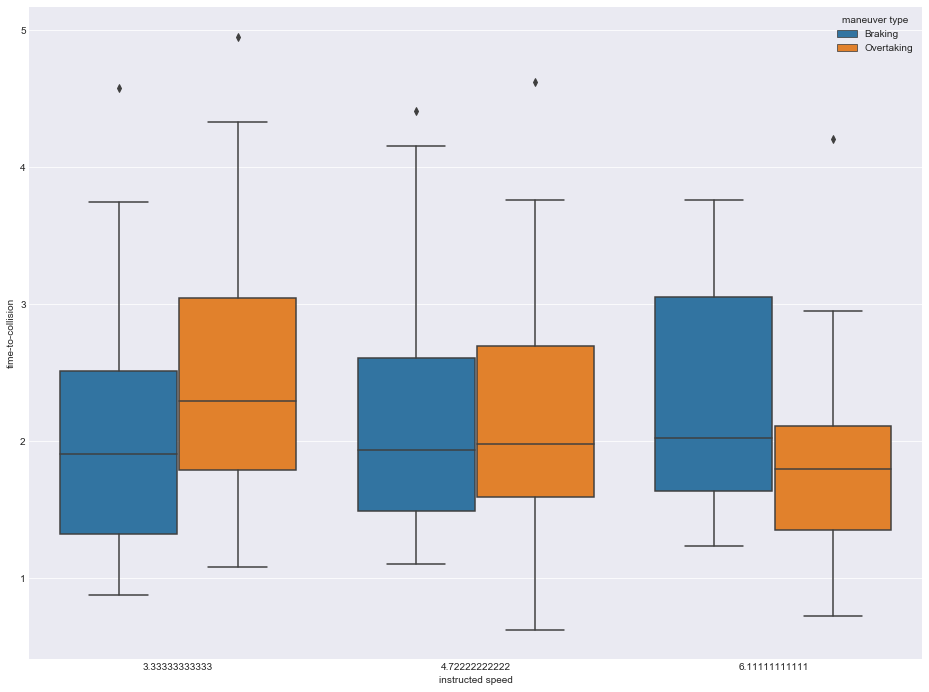

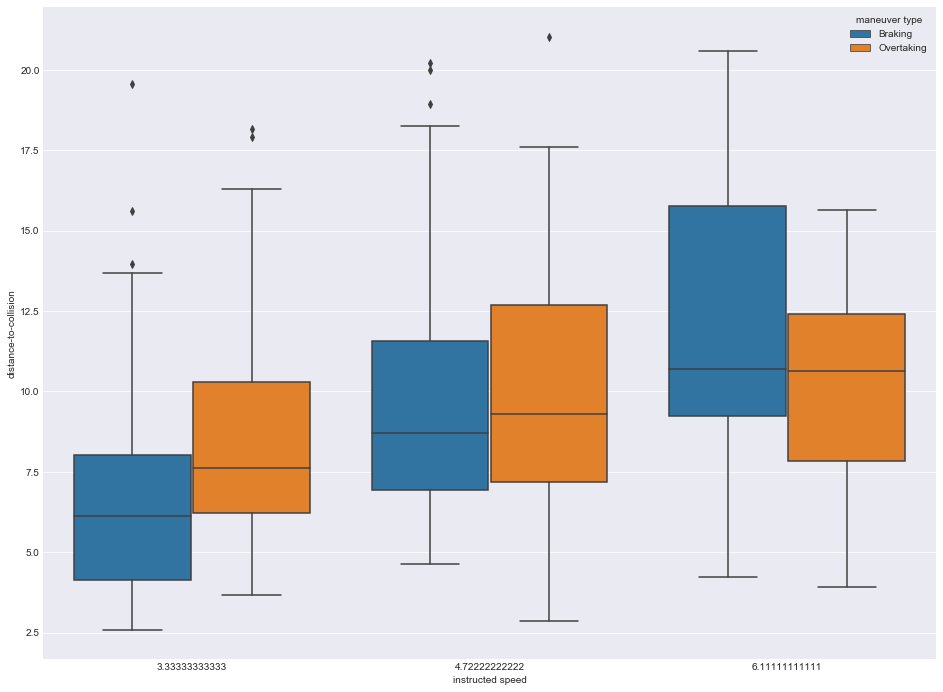

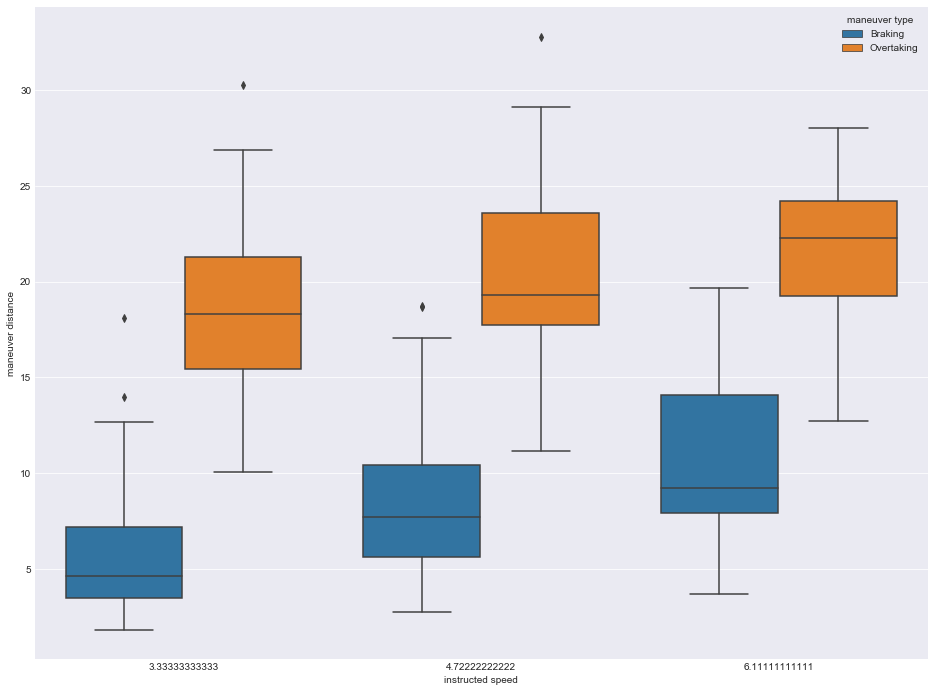

In [29]:
plt.close('all')

fig1, ax1 = plt.subplots()
sns.boxplot(x='instructed speed',
            y='time-to-collision',
            hue='maneuver type',
            ax=ax1,
            data=comparison_df)

fig2, ax2 = plt.subplots()
sns.boxplot(x='instructed speed',
            y='distance-to-collision',
            hue='maneuver type',
            ax=ax2,
            data=comparison_df)

fig3, ax3 = plt.subplots()
sns.boxplot(x='instructed speed',
            y='maneuver distance',
            hue='maneuver type',
            ax=ax3,
            data=comparison_df)

plt.show()

fig1.savefig('fig1.svg')
fig2.savefig('fig2.svg')
fig3.savefig('fig3.svg')

In [4]:
CATEGORICAL_PLOT_SATURATION = 0.75
helper = sns.categorical._CategoricalPlotter()
helper.hue_names = list(range(16))
helper.establish_colors(color=None, palette=None,
                        saturation=CATEGORICAL_PLOT_SATURATION)

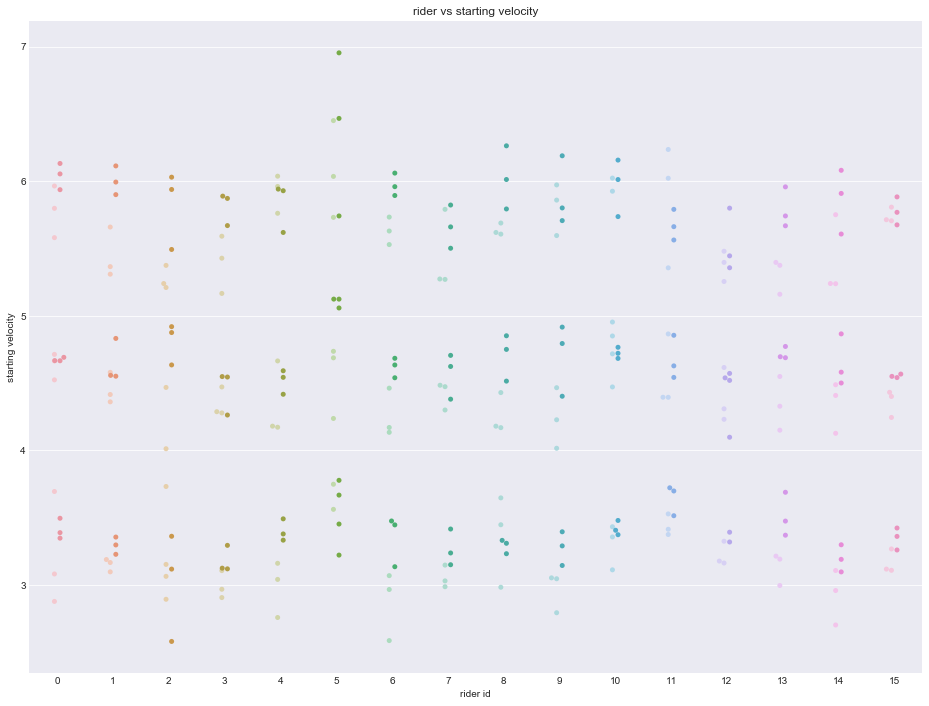

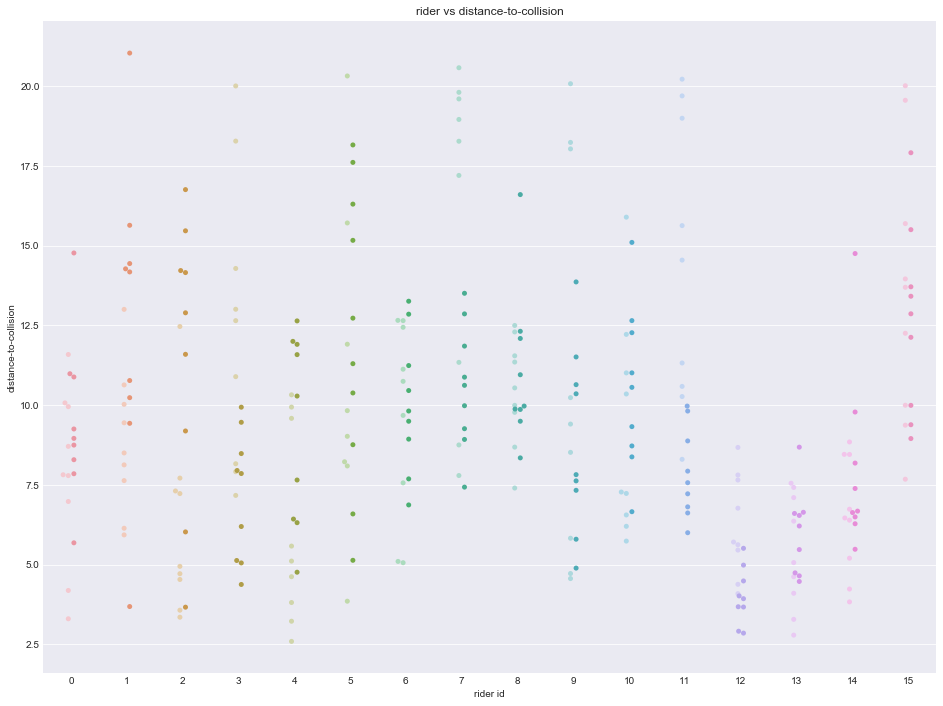

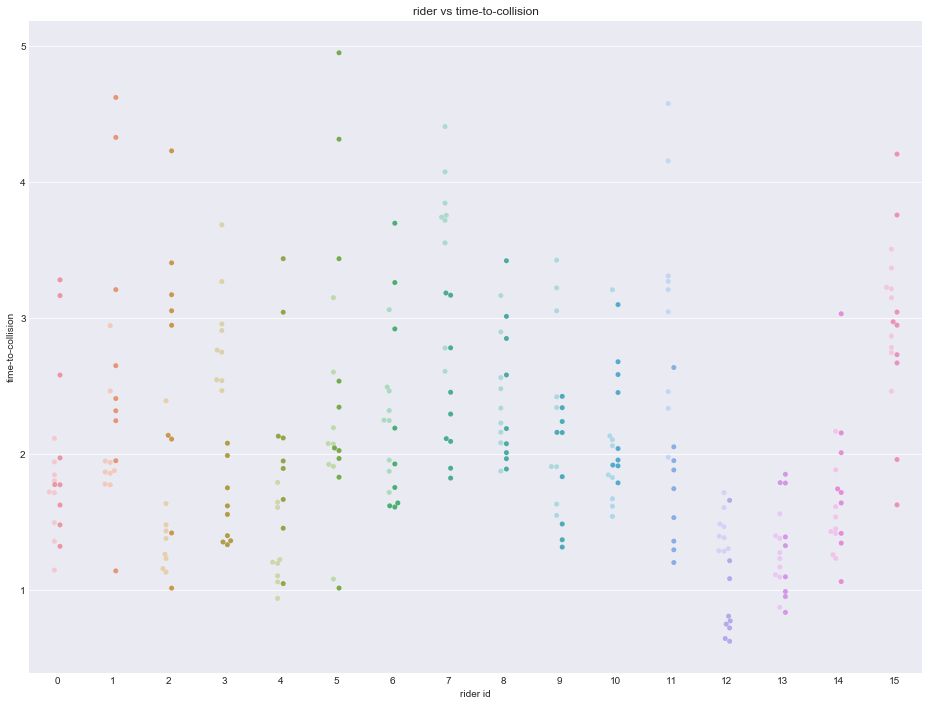

In [15]:
#%matplotlib notebook
#mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

def set_swarmplot_labels(ax, event_types):
    handles, labels = ax.get_legend_handles_labels()
    n = len(labels)
    assert n % 2 == 0 # check if even
    
    labels = ['{} {}'.format(event_type, rider_id)
              for event_type, rider_id in itertools.product(
                  event_types, labels[:n//2])]
    
    ax.legend(handles, labels, ncol=2)
    
def shift_swarmplot(ax, shift_value=0.05):
    collections = ax.collections
    n = len(collections)
    
    # collections are ordered as:
    # [c0, c1, c2, c3, x, x, x, x,
    #  c4, c5, c7, c6, x, x, x, x]
    collections = [c for i, c in enumerate(collections)
                   if (i//n) % n//4 == 0]
    
    for i, c in enumerate(collections):
        if i < n//4:
            sign = -1
        else:
            sign = 1
        
        offsets = c.get_offsets()
        shifts = np.matlib.repmat(
            np.array([[sign*shift_value, 0]]),
            offsets.shape[0], 1)
        
        c.set_offsets(offsets + shifts)
            
def plot_combined_swarm(y, df_filter=None):
    """
    y: dataframe column
    df_filter: dataframe filter function, description
    """
    paired_colors = []
    for c in helper.colors:
        c_light = sns.light_palette(c)
        paired_colors.append(c_light[2])
        paired_colors.append(c)
    
    fig, ax = plt.subplots()
    
    def apply_filter(df):
        if df_filter is None:
            return df
        else:
            f = df_filter[0]
            return df[f(df)]
    
    sns.swarmplot(x='rider id', y=y, data=apply_filter(braking_df), ax=ax,
                  hue='rider id', palette=paired_colors[::2])
    sns.swarmplot(x='rider id', y=y, data=apply_filter(steering_df), ax=ax,
                  hue='rider id', palette=paired_colors[1::2])
    
    #set_swarmplot_labels(ax, ['braking', 'steering'])
    ax.get_legend().remove()
    shift_swarmplot(ax)

    title = 'rider vs {}'.format(y)
    if df_filter is not None:
        title = '{} ({})'.format(title, df_filter[1])
    ax.set_title(title) 
    return fig, ax

plt.close('all')

plot_combined_swarm('starting velocity')
plot_combined_swarm('distance-to-collision')
plot_combined_swarm('time-to-collision')

plt.show()

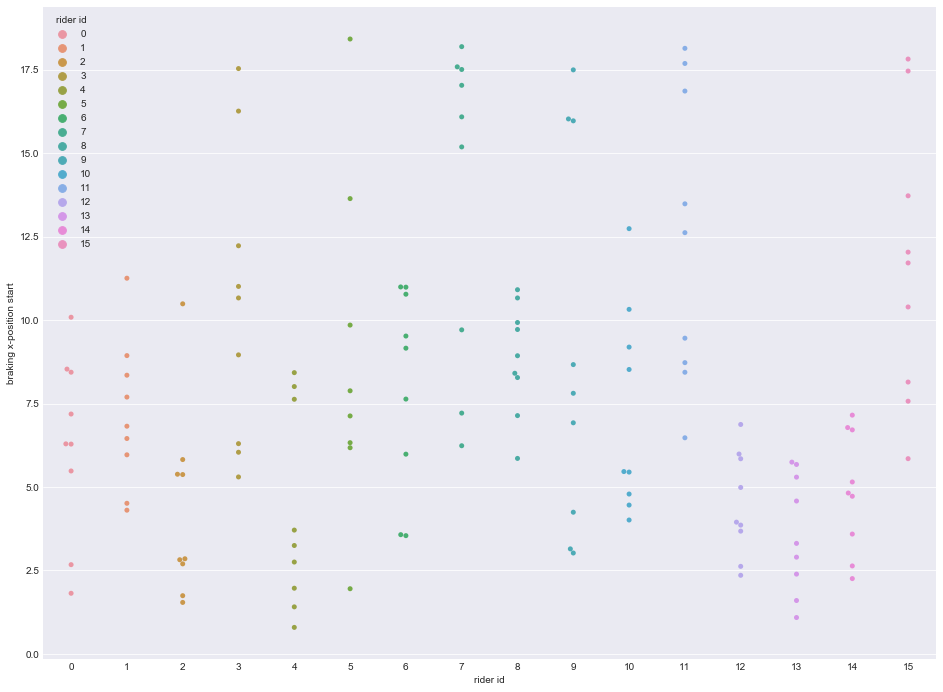

In [16]:
sns.swarmplot(x='rider id',
              y='braking x-position start',
              data=braking_df,
              hue='rider id',
              palette=helper.colors)

In [103]:
#%matplotlib notebook
#mpl.rcParams['figure.figsize'] = DEFAULT_FIGSIZE

def plot_combined_joint(x, y, df_filter=None, key=None, figsize=None):
    """
    x: dataframe column
    y: dataframe column
    df_filter: dataframe filter function, description
    """
    
    def apply_filter(df):
        if df_filter is None:
            return df
        else:
            f = df_filter[0]
            return df[f(df)]
        
    labels = ['braking', 'steering']
    if key is None:
        g = plotjoint(x, y, apply_filter(braking_df))
        g = plotjoint(x, y, apply_filter(steering_df), g=g)
        g.ax_joint.legend(labels)
    else:
        markers = ['o', 'P']
        
        paired_colors = []
        for c in sns.color_palette('tab10', 10):
            c_light = sns.light_palette(c)
            paired_colors.append(tuple(c_light[2][:3]))
            paired_colors.append(c)
            
        g = plotjoint(x, y, apply_filter(braking_df),
                      (key, paired_colors[::2]),
                      show_hull=False,
                      alpha=0.9,
                      marker=markers[0])
        
        g = plotjoint(x, y, apply_filter(steering_df),
                      (key, paired_colors[1::2]),
                      show_hull=False,
                      g=g,
                      alpha=0.9,
                      marker=markers[1])
        
        handles = []
        for (event_type, colors), k in itertools.product(
            zip(labels, [paired_colors[::2], paired_colors[1::2]]),
            steering_df[key].unique()):
            
            if event_type == 'braking':
                marker = markers[0]
            else:
                marker = markers[1]
                    
            h = mlines.Line2D(
                [], [], color=colors[k], marker=marker,
                markersize=6, linestyle=' ',
                label='{} {}'.format(event_type, k))
            handles.append(h)
        
        g.ax_joint.legend(handles=handles, ncol=2)
    
    if figsize is None:
        figsize = mpl.rcParams['figure.figsize']
    if figsize is not None:
        g.fig.set_size_inches(figsize)
        
    g.fig.subplots_adjust(top=0.9)
    title = '{} vs {}'.format(x, y)
    if df_filter is not None:
        title = '{} ({})'.format(title, df_filter[1])
    g.fig.suptitle(title)
    
    x = np.concatenate((braking_df[x].as_matrix(), steering_df[x].as_matrix()))
    y = np.concatenate((braking_df[y].as_matrix(), steering_df[y].as_matrix()))
    
    x_min = x.min()
    x_max = x.max()
    x_ptp = x_max - x_min
    
    y_min = y.min()
    y_max = y.max()
    y_ptp = y_max - y_min
    
    assert x_ptp > 0
    assert y_ptp > 0
    g.ax_joint.set_xlim((x_min - 0.1*x_ptp, x_max + 0.1*x_ptp))
    g.ax_joint.set_ylim((y_min - 0.1*y_ptp, y_max + 0.1*y_ptp))
    
    return g

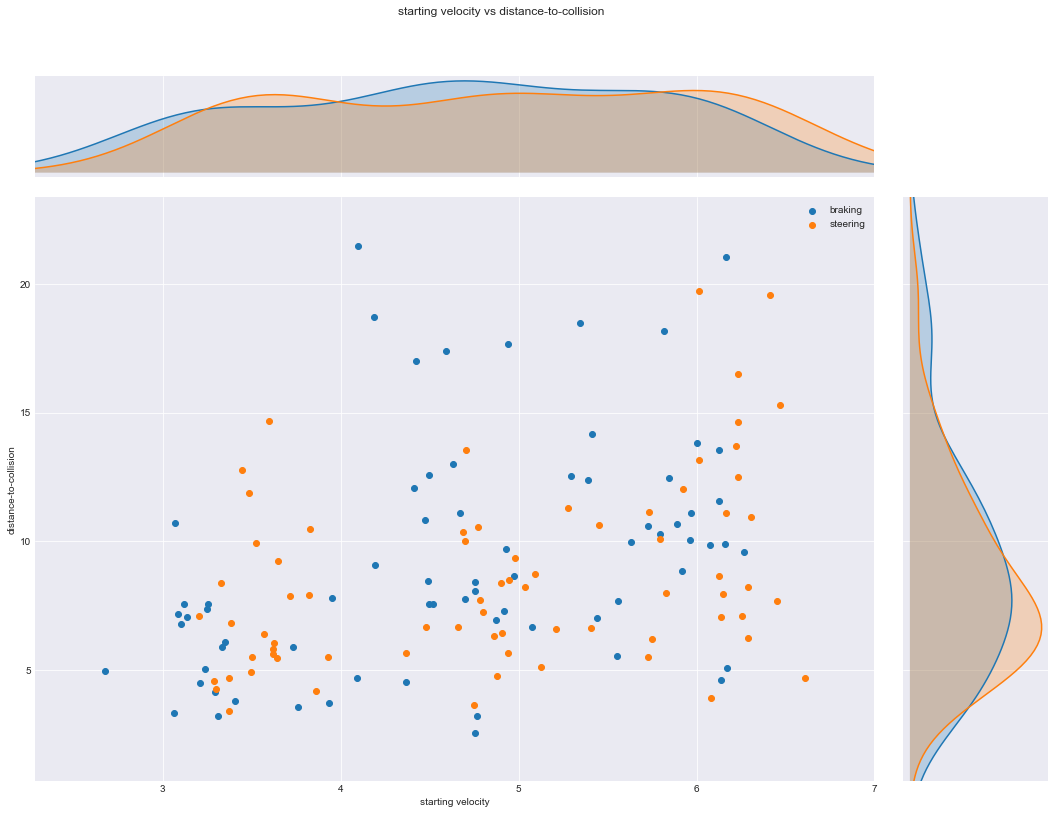

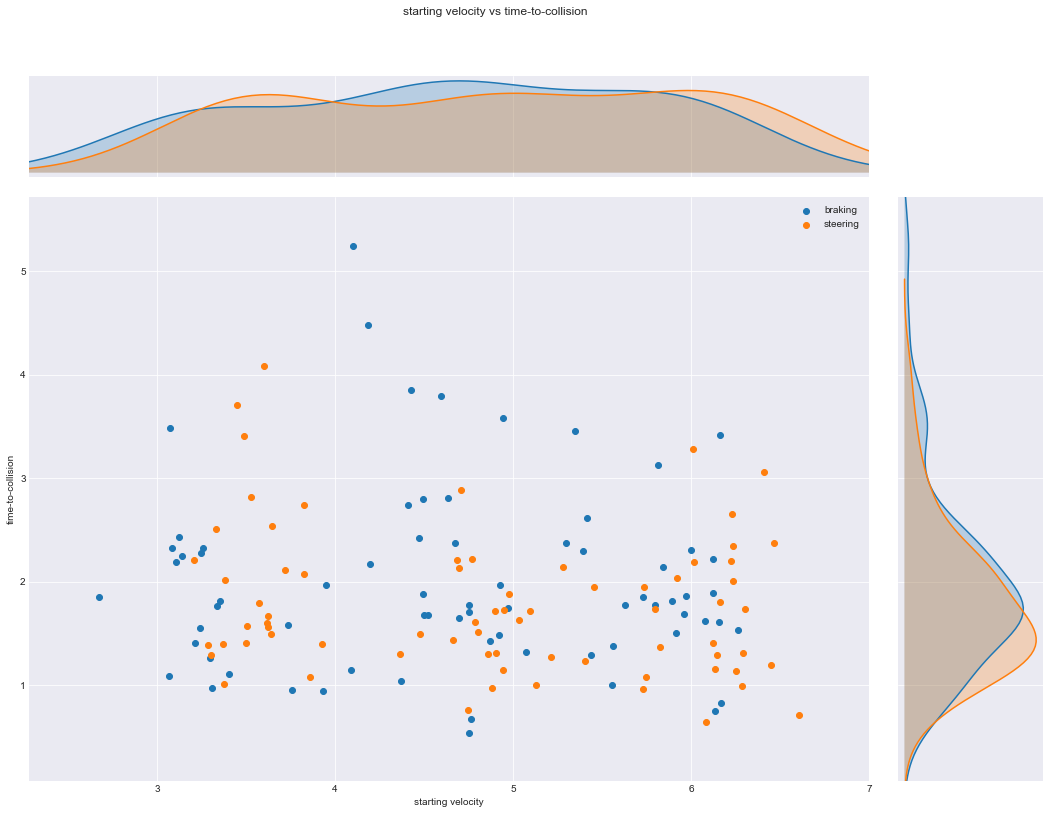

In [63]:
plt.close('all')
g = plot_combined_joint('starting velocity', 'distance-to-collision')
g = plot_combined_joint('starting velocity', 'time-to-collision')
plt.show()

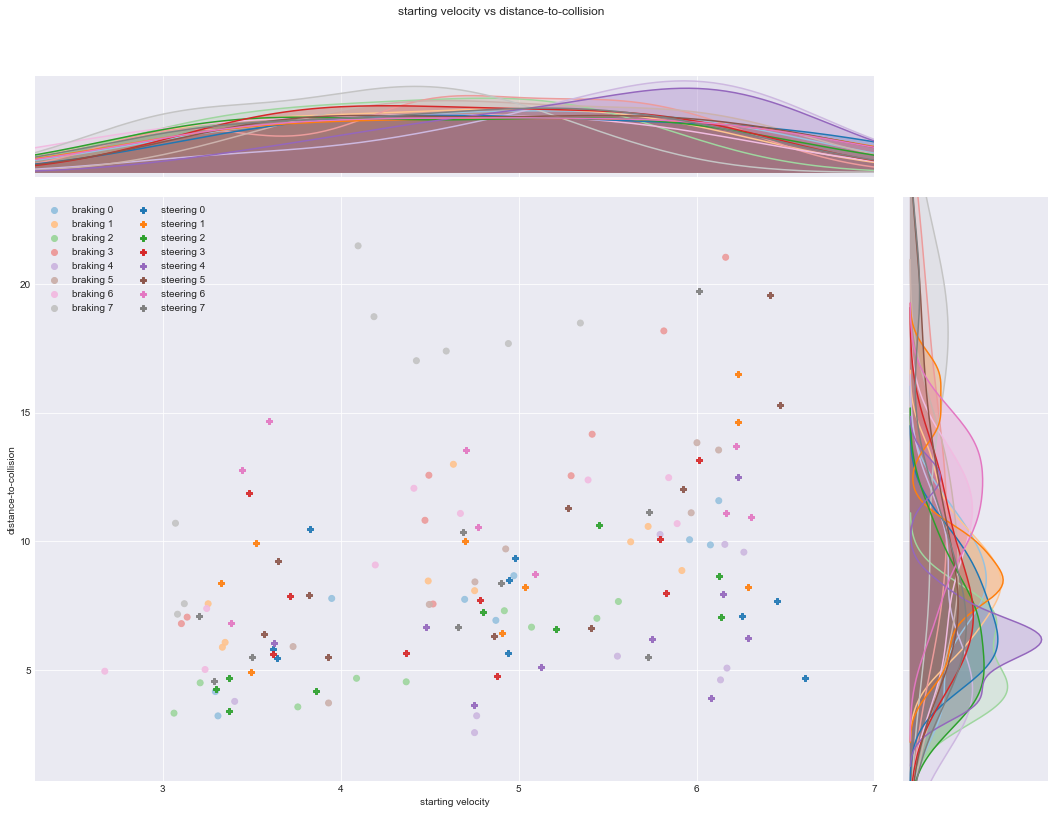

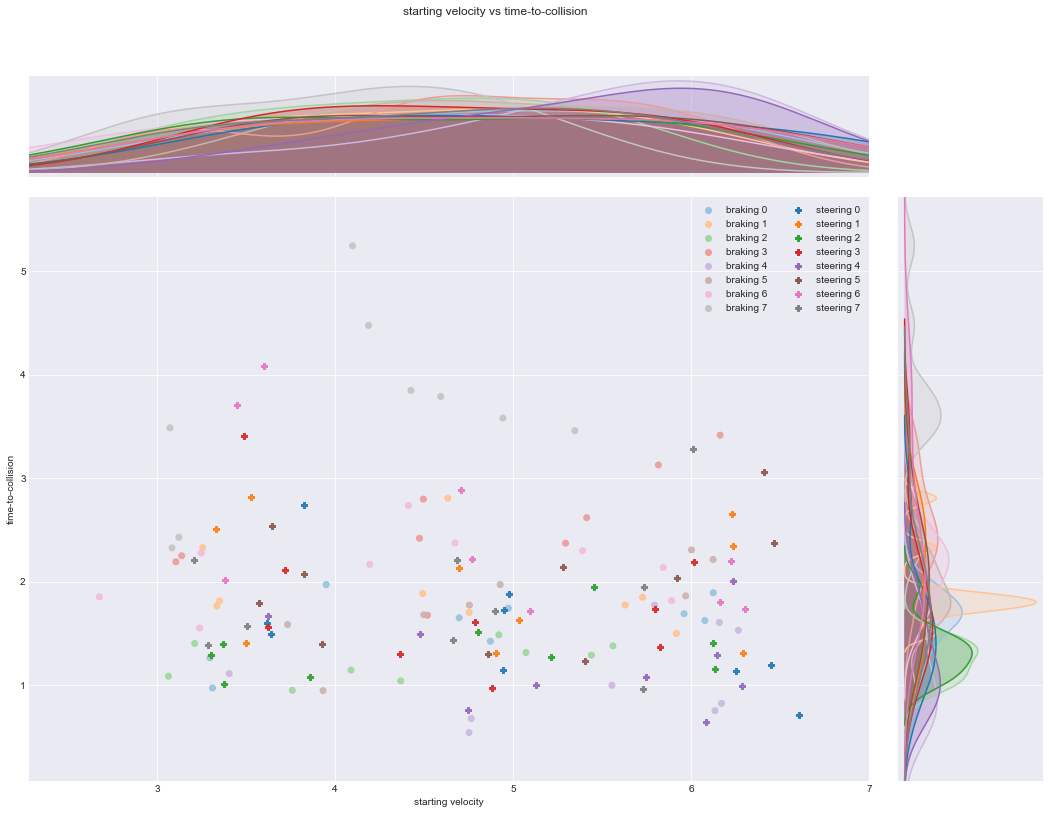

In [104]:
plt.close('all')
g = plot_combined_joint('starting velocity', 'distance-to-collision', key='rider id')
g = plot_combined_joint('starting velocity', 'time-to-collision', key='rider id')
plt.show()